## Imagens Coloridas

Como já vimos, as imagens manipuladas pelo `scikit-image` são simplesmente arrays do Numpy. Consequentemente, uma grande parte das operações sobre as imagens consistem do uso das funcionalidades do Numpy.

As imagens coloridas seguem este mesmo conceito: são arrays do Numpy, mas com uma dimensão adicional para os canais:

In [2]:
%matplotlib inline

In [81]:
from skimage import data
cat = data.chelsea()
type(cat)

numpy.ndarray

In [3]:
cat.shape

(300, 451, 3)

Isto mostra que `cat` é um imagem com 300x451 pixels, com três canais (vermelho, verde e azul). 
Como antes, podemos acessar e definir os valores dos pixels:

In [4]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

In [5]:
# definindo o pixel na linha 50, coluna 60 como "black"
cat[50,60] = 0

In [6]:
# definindo o pixel na linha 50, coluna 61 como verde
cat[50,61] = [0,255,0] # [red, green, blue]

Nós também podemos utilizar máscaras booleanas 2D para uma imagem colorida 2D, como fizemos para imagens de nível de cinza:

Utilizando uma máscara 2D em uma imagem colorida 2D

In [82]:
import matplotlib.pyplot as plt
import numpy as np

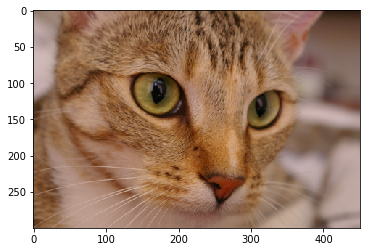

In [8]:
cat = data.chelsea()
plt.imshow(cat)

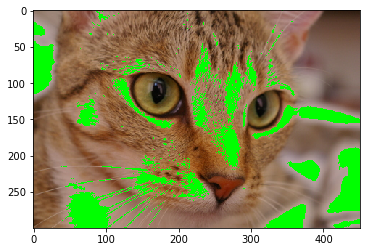

In [9]:
cat = data.chelsea()
reddish = cat[:,:,0] > 180
cat[reddish] = [0,255,0]
plt.imshow(cat)

In [10]:
cat.shape

(300, 451, 3)

In [11]:
reddish.shape

(300, 451)

In [4]:
import skimage.color

In [13]:
cat_orig = data.chelsea()
cat_hsv = skimage.color.convert_colorspace(cat_orig,"RGB","HSV")
cat_g = skimage.color.rgb2gray(cat_orig)

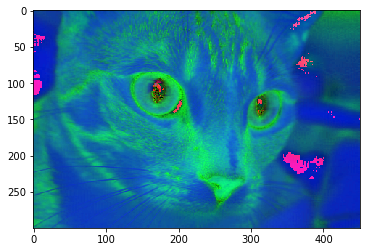

In [14]:
plt.imshow(cat_hsv, cmap = 'hsv')

In [15]:
cat_orig[50,60],cat_hsv[50,60],cat_g[50,60]

(array([160, 118,  78], dtype=uint8),
 array([0.08130081, 0.5125    , 0.62745098]),
 0.48643529411764713)

In [16]:
cat_orig[1:3,1:3,:]

array([[[145, 122, 106],
        [143, 120, 104]],

       [[147, 125, 111],
        [146, 122, 109]]], dtype=uint8)

In [17]:
cat_orig[1:3,1:3,:]/255

array([[[0.56862745, 0.47843137, 0.41568627],
        [0.56078431, 0.47058824, 0.40784314]],

       [[0.57647059, 0.49019608, 0.43529412],
        [0.57254902, 0.47843137, 0.42745098]]])

## Exercícios

1. Utilize duas imagens coloridas diferentes e refaça os processamentos que fizemos nos notebooks anteriores para explorar os conceitos de imagens coloridas. As imagens devem estar no espaço de cores RGB para estas operações.

    a. Transformações de Intensidade (equalização e normalização)


In [83]:
from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import unsharp_mask

img_ast = data.astronaut()

(<matplotlib.image.AxesImage at 0x1c89715bf60>,
 Text(0.5, 1.0, 'Imagem RGB original'))

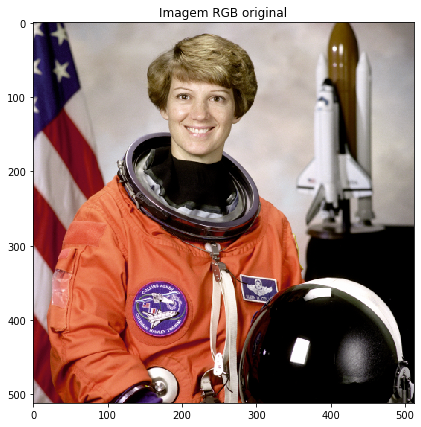

In [21]:
fig = plt.figure(figsize=(14, 7))
plt.imshow(img_ast), plt.title("Imagem RGB original")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c00ef0c588>,
 Text(0.5, 1.0, 'Imagem normalizada'))

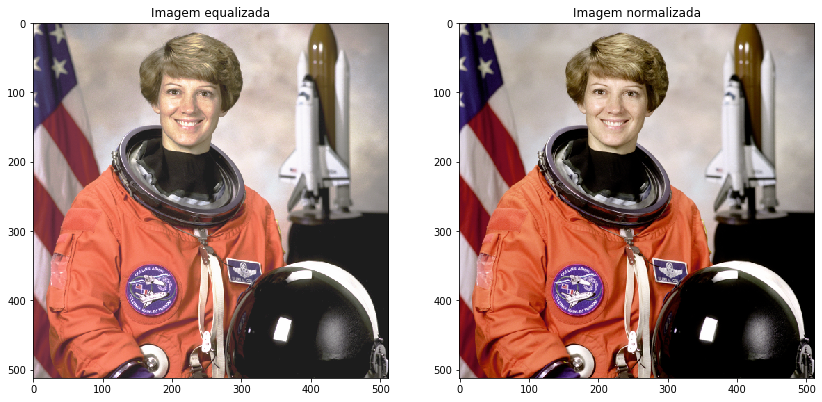

In [42]:
img_ast_eq = exposure.equalize_hist(img_ast)

img_ast_norm = img_ast.copy()

img_ast_norm = img_ast_norm / 255

fig = plt.figure(figsize=(14, 7))

plt.subplot(121),plt.imshow(img_ast_eq), plt.title("Imagem equalizada")

plt.subplot(122),plt.imshow(img_ast_norm), plt.title("Imagem normalizada")


(<matplotlib.image.AxesImage at 0x1c8990b0be0>,
 Text(0.5, 1.0, 'Imagem RGB original'))

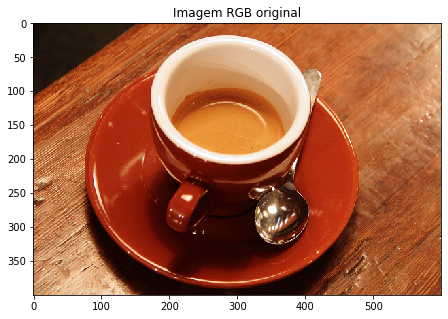

In [84]:
img_cf = data.coffee()
fig = plt.figure(figsize=(14, 5))
plt.imshow(img_cf), plt.title("Imagem RGB original")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c00f122978>,
 Text(0.5, 1.0, 'Imagem normalizada'))

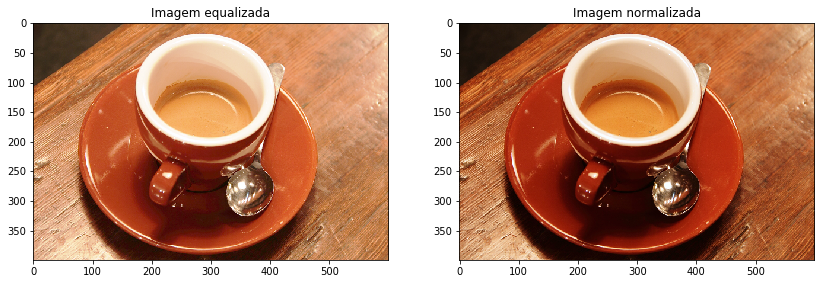

In [44]:
img_cf_eq = exposure.equalize_hist(img_cf)

img_cf_norm = img_cf.copy()

img_cf_norm = img_cf_norm / 255

fig = plt.figure(figsize=(14, 7))

plt.subplot(121),plt.imshow(img_cf_eq), plt.title("Imagem equalizada")

plt.subplot(122),plt.imshow(img_cf_norm), plt.title("Imagem normalizada")

    b. Filtros Espaciais (filtro de suavização e de aguçamento)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c0155966d8>,
 Text(0.5, 1.0, 'Imagem aguçada'))

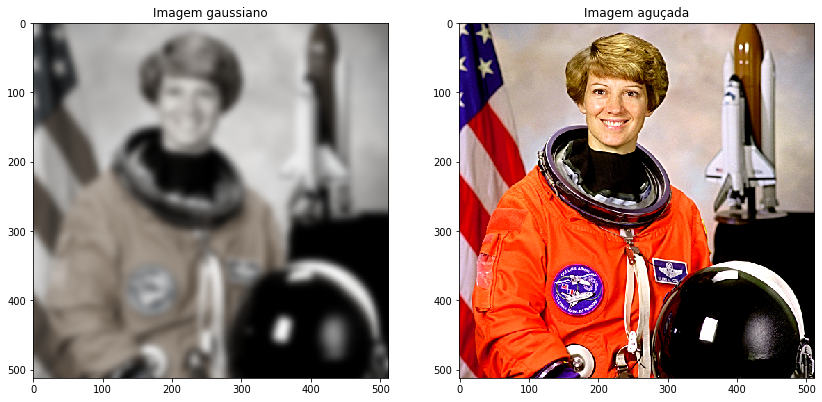

In [60]:
ast_gaus = gaussian(img_ast,sigma=5,multichannel=False)

aust_sharp = unsharp_mask(img_ast, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(ast_gaus), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(aust_sharp), plt.title("Imagem aguçada")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c01b3ab2b0>,
 Text(0.5, 1.0, 'Imagem aguçada'))

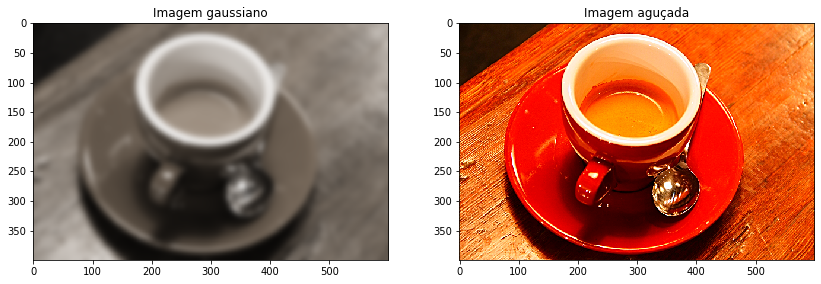

In [61]:
cf_gaus = gaussian(img_cf,sigma=5,multichannel=False)

cf_sharp = unsharp_mask(img_cf, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(cf_gaus), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(cf_sharp), plt.title("Imagem aguçada")

    c. Filtros de Frequência (filtro passa baixa Butterworth e filtro passa-alta Gaussiano)
    
    Para cada processamento, documente os resultados obtidos, indicando se são coerentes ou não.

In [62]:
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc

def butter2d_lp(shape, f, n, pxd=1): 
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis]) 
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

def butter2d_hp(shape, f, n, pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    return 1. - butter2d_lp(shape, f, n, pxd)

In [223]:
def butter_lp_canal(canal, n):
    f = np.fft.fft2(canal)
    filtro_b = butter2d_lp(canal.shape, f, n)
    mult = f * filtro_b
    retorno = np.abs(np.fft.ifft2(mult))
    return retorno

In [272]:
from scipy import signal

def gaus_hp_canal(canal, n):
    kernel = 1. - np.outer(signal.gaussian(canal.shape[0], n), signal.gaussian(canal.shape[1], n))
    f = np.fft.fft2(canal)
    f_kernel = np.fft.fft2(np.fft.fftshift(kernel))
    mult = f*f_kernel
    retorno = np.abs(np.fft.ifft2(mult))
    
    print(retorno[0,0])
    return retorno

(<matplotlib.axes._subplots.AxesSubplot at 0x1c8b21ca048>,
 Text(0.5, 1.0, 'Imagem Gaussiano'))

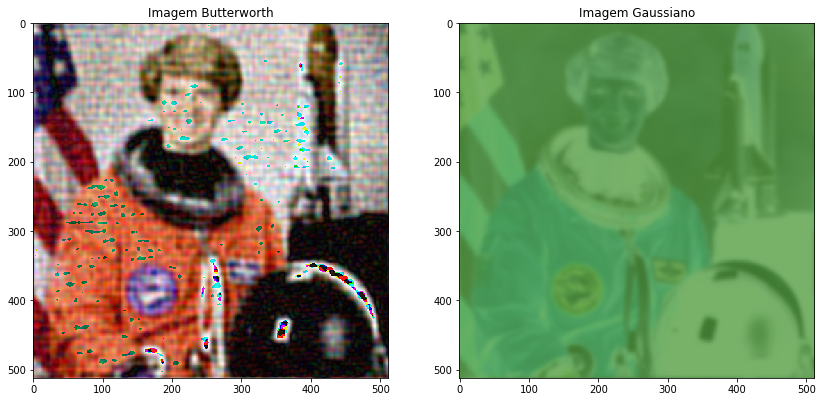

In [210]:
from scipy import signal

r = img_ast[:,:,0].copy() / 255
g = img_ast[:,:,1].copy() / 255
b = img_ast[:,:,2].copy() / 255 

img_ast_b = img_ast.copy()
img_ast_g = img_ast.copy()

#butterworth
img_ast_b[:,:,0] = butter_lp_canal(r, 5) * 255 
img_ast_b[:,:,1] = butter_lp_canal(g, 5) * 255
img_ast_b[:,:,2] = butter_lp_canal(b, 5) * 255

#gaussiano
img_ast_g[:,:,0] = gaus_hp_canal(r, 3) 
img_ast_g[:,:,1] = gaus_hp_canal(g, 3)
img_ast_g[:,:,2] = gaus_hp_canal(b, 3)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(img_ast_b), plt.title("Imagem Butterworth")
plt.subplot(122),plt.imshow(img_ast_g), plt.title("Imagem Gaussiano")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c8b2410be0>,
 Text(0.5, 1.0, 'Imagem Gaussiano'))

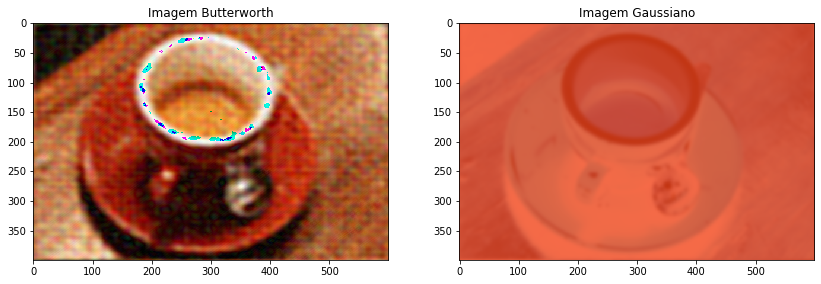

In [211]:
from scipy import signal

r = img_cf[:,:,0].copy() / 255
g = img_cf[:,:,1].copy() / 255
b = img_cf[:,:,2].copy() / 255 

img_cf_b = img_cf.copy()
img_cf_g = img_cf.copy()

#butterworth
img_cf_b[:,:,0] = butter_lp_canal(r, 5) * 255 
img_cf_b[:,:,1] = butter_lp_canal(g, 5) * 255
img_cf_b[:,:,2] = butter_lp_canal(b, 5) * 255

#gaussiano
img_cf_g[:,:,0] = gaus_hp_canal(r, 3) 
img_cf_g[:,:,1] = gaus_hp_canal(g, 3)
img_cf_g[:,:,2] = gaus_hp_canal(b, 3)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(img_cf_b), plt.title("Imagem Butterworth")
plt.subplot(122),plt.imshow(img_cf_g), plt.title("Imagem Gaussiano")

2. Utilize a função `skimage.color.convert_colorspace` e explore os processamentos nos espaços de cor "RGB" e "HSV". Repita os processamentos da questão 1.


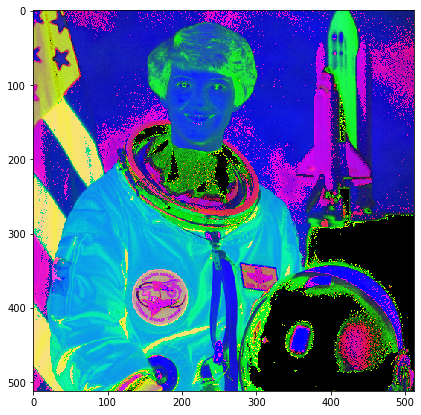

In [215]:
fig = plt.figure(figsize=(14, 7))
ast_hsv = color.rgb2hsv(img_ast)
plt.imshow(ast_hsv, cmap="hsv")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c8b6033ba8>,
 Text(0.5, 1.0, 'Imagem aguçada'))

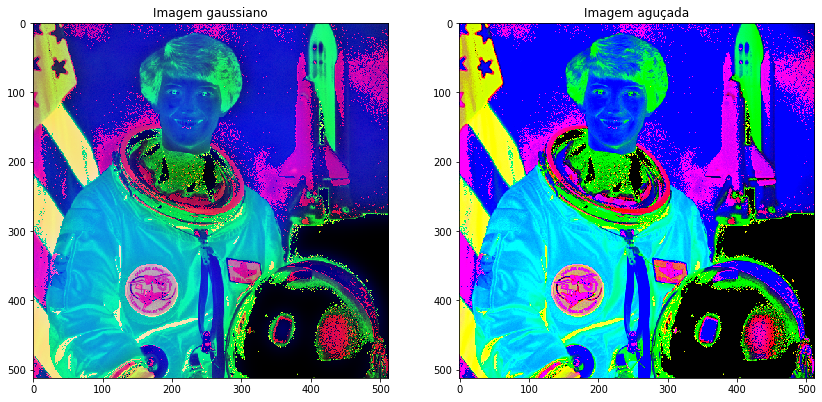

In [220]:
ast_gaus = ast_hsv.copy()
ast_gaus[:,:,2] = gaussian(ast_gaus[:,:,2],sigma=15,multichannel=False)

aust_sharp = unsharp_mask(ast_hsv, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(ast_gaus), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(aust_sharp), plt.title("Imagem aguçada")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9047619  0.04545455 0.60392157]
146990.79026619485
[0.9047619  0.04545455 0.51840571]


(<matplotlib.axes._subplots.AxesSubplot at 0x1c8d82fe0b8>,
 Text(0.5, 1.0, 'Imagem Gaussiano'))

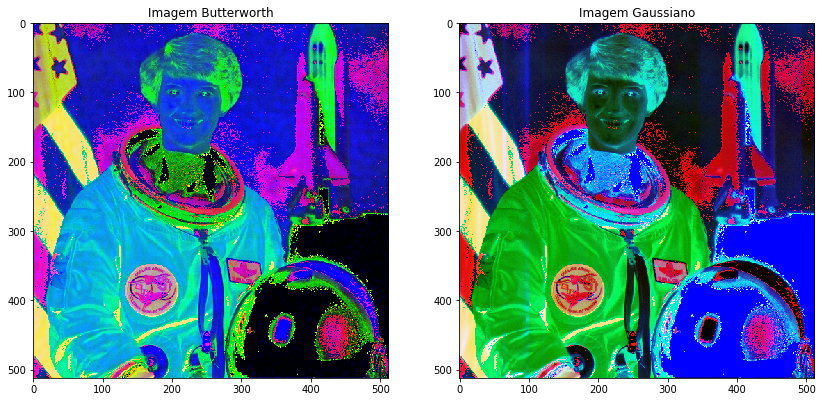

In [283]:
##aplicando os filtros somente no canal do valor do hsv e transformando de volta para rgb

v = ast_hsv[:,:,2].copy()

ast_hsv_b = ast_hsv.copy()
ast_hsv_g = ast_hsv.copy()

print(ast_hsv_g[0,0])

#butterworth
ast_hsv_b[:,:,2] = butter_lp_canal(v, 5)

#gaussiano normalizando o resultado entre 0 e 1
from sklearn import preprocessing
ast_hsv_g[:,:,2] = preprocessing.minmax_scale(gaus_hp_canal(ast_hsv_g[:,:,2], 1))


print(ast_hsv_g[0,0])

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(ast_hsv_b), plt.title("Imagem Butterworth")
plt.subplot(122),plt.imshow(ast_hsv_g), plt.title("Imagem Gaussiano")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x1c8d84ba588>,
 Text(0.5, 1.0, 'Imagem Gaussiano'))

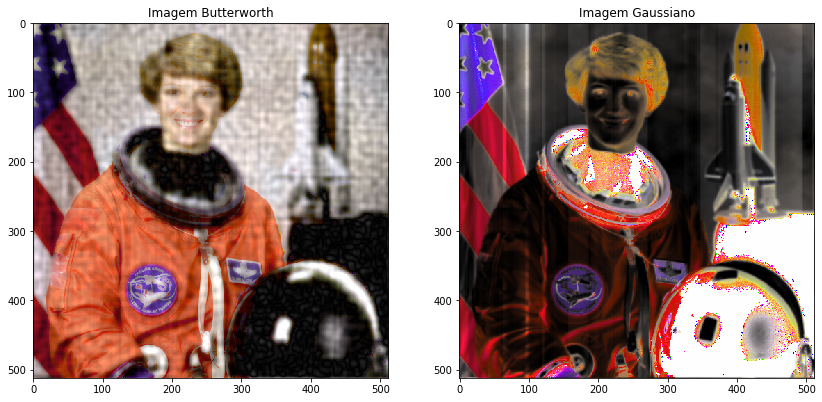

In [282]:
fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(color.hsv2rgb(ast_hsv_b)), plt.title("Imagem Butterworth")
plt.subplot(122),plt.imshow(color.hsv2rgb(ast_hsv_g)), plt.title("Imagem Gaussiano")

3. Compare os resultados dos processamentos feitos no espaço de cor 'RGB' e 'HSV' e com as imagens convertidas para *nível de cinza*. Explique os resultados obtidos.

In [247]:
gray = rgb2gray(img_ast)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c8aad57f60>,
 Text(0.5, 1.0, 'Imagem aguçada'))

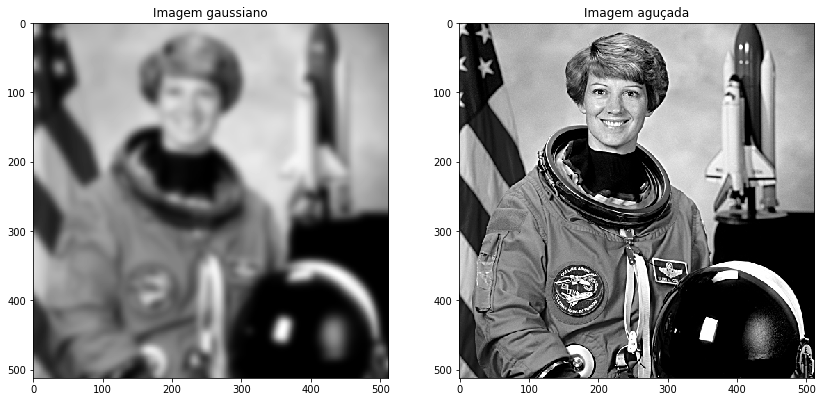

In [260]:
gray_gaus = gaussian(gray,sigma=5,multichannel=False)

gray_sharp = unsharp_mask(gray, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(gray_gaus, cmap="gray"), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(gray_sharp, cmap="gray"), plt.title("Imagem aguçada")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c8cf1d8978>,
 Text(0.5, 1.0, 'Imagem Gaussiano'))

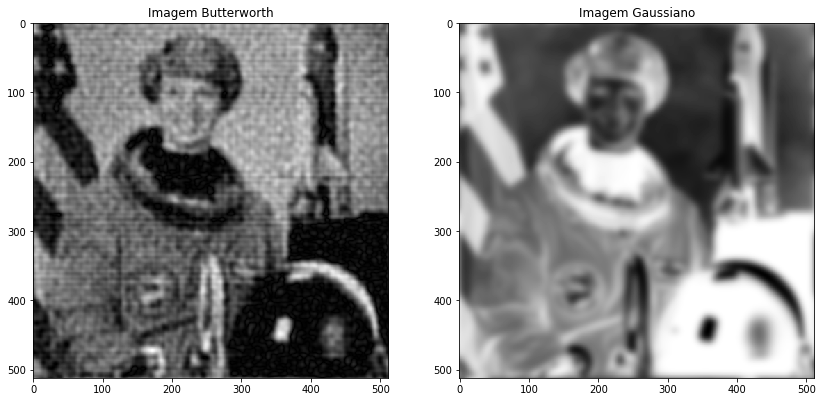

In [265]:
gray_b = gray.copy()
gray_g = gray.copy()

#butterworth
gray_b = butter_lp_canal(gray, 5)

gray_g = gaus_hp_canal(gray, 5)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(gray_b, cmap="gray"), plt.title("Imagem Butterworth")
plt.subplot(122),plt.imshow(gray_g, cmap="gray"), plt.title("Imagem Gaussiano")

##### i) Na imagem em RGB os filtros no campo espacial não tiveram muitos problemas de serem aplicados como o filtro gaussiano e o de realce. Porém no campo da frequência  tiveram que ser aplicados separadamente em cada camada, com isso as cores foram alteradas já que o valor RGB de cada pixel foi modificado.
##### ii) Na imagem HSV, todos os filtros foram aplicados no valor V da imagem, alterando somente a itensidade do pixel.Dessa forma as mudanças mantiveram a as cores originais, sem muitos problemas apresentados na aplicação da imagem RGB.
##### iii) Na imagem em escala de cinza, como só tem 1 canal as aplicações são mais simples e funcionam perfeitamente, o único problema é a falta de informação de cor das outras imagens.


### Exercício de implementação

Implemente uma função de conversão de espaço de cor RGB para HSV conforme apresentado no livro texto (Gonzalez & Woods, capítulo 6.) Compare (demonstre) o resultado da sua função com as funções da biblioteca `skimage.color.convert_colorspace`

In [213]:
import numpy as np
from skimage import io
import math
from skimage import color
import matplotlib.pyplot as plt

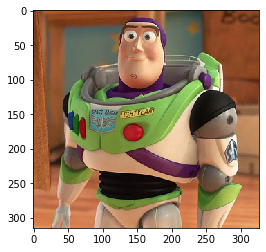

In [11]:
img = io.imread('buzz.jpg')

plt.imshow(img)

In [83]:
def calcular_h(r, g, b):

    h = r.copy()

    for x in range (len(r)):
        for y in range (len(r[0])):
            numerador = (((r[x][y] - g[x][y]) + (r[x][y] - b[x][y])) * 0.5) 
            denominador = (((r[x][y] - g[x][y]) ** 2) + ((r[x][y] - b[x][y]) * (g[x][y] - b[x][y]))) ** 0.5
            
            h[x][y] = math.acos(numerador / (denominador + 0.0001))
            
            if b[x][y] > g[x][y]:
                h[x][y] = 360 - h[x][y]
            
            h[x][y] = h[x][y] / 360
                
    return h
            

def calcular_s(r, g, b):
    minimo = np.minimum(np.minimum(r, g), b)
    s = 1 - (3 / (r + g + b + 0.001)) * minimo
    return s

def calcular_i(r, g, b):
    return np.divide(b + g + r, 3)

def transformar_hsi(rgb):
    
    #normalizando os valores para entre 0 e 1
    rgb2 = np.float32(rgb)/255
    
    red = rgb2[:,:,0].copy()
    green = rgb2[:,:,1].copy()
    blue = rgb2[:,:,2].copy()
    
    hsi = rgb2.copy()
    hsi[:,:,0] = calcular_h(red, green, blue)
    hsi[:,:,1] = calcular_s(red, green, blue)
    hsi[:,:,2] = calcular_i(red, green, blue)
    
    
    return hsi

[0.00112183 0.62140954 0.2379085 ]


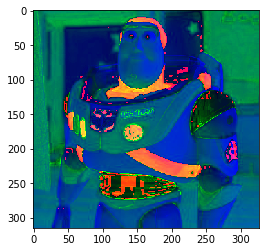

In [84]:
hsv = transformar_hsi(img)
print(hsv[0,0])
plt.imshow(hsv,  cmap="hsv")

[0.06584362 0.77884615 0.40784314]


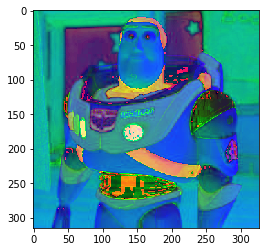

In [57]:
image_hsv = color.rgb2hsv(img)
print(image_hsv[0,0])
plt.imshow(image_hsv, cmap="hsv")